Work in progress (WIP)

## Analysing web traffic data from jorjmakesmusic.com

Obtained traffic data in .csv from wix relating to traffic from the jorjmakesmusic.com website. Cleaned data and showed points of interest on graphs.

Import all necessary packages, set pandas options and open csv. All columns start with 'Traffic ' so have removed this from each column for better code legibility.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

f = open('input/jorjmakesmusic_traffic.csv')
traffic_raw = pd.read_csv(f)

traffic_raw.rename(columns=lambda x: x[8:], inplace=True)
traffic_raw.head(20)

,Day,New or Returning Visitor,Referring Category Ø,Referring Site Ø,Referring URL,UTM Campaign Name Ø,UTM Campaign Medium Ø,UTM Campaign Source Ø,Page Path Ø,Page URL,Country,Region,City,Device Type,Browser,Browser Version,Operating System,Is the First Page Viewed Ø (Yes / No),Is the Last Page Viewed Ø (Yes / No),Next Page Viewed Ø,Previous Page Viewed Ø,Page Views,Site Sessions Ø,Unique Visitors,Site Bounce Rate Ø,Avg. Session Duration Ø,Avg. Time on Page Ø,Avg. Pages per Session Ø
0,20/05/2020,Returning Visitor,Direct,Direct,NaN,_,_,_,/maturity,http://jorjmakesmusic.com/maturity,United Kingdom,ENG,London,Desktop,Chrome,81.0.4044.138,Windows,Yes,Yes,NaN,NaN,7,1,1,0,0.003808,0.000272,1.0
1,22/05/2020,Returning Visitor,Direct,Direct,NaN,_,_,_,/early-access,http://jorjmakesmusic.com/early-access,United Kingdom,GRE,Greenwich,Desktop,Chrome,81.0.4044.138,Windows,Yes,No,/exclusive,NaN,5,1,1,0,0.021354,0.002581,1.0
2,05/05/2020,New Visitor,Social,facebook.com,http://m.facebook.com,_,_,_,/,http://jorjmakesmusic.com,United Kingdom,BNH,Brighton,Mobile,Safari,NaN,Mac OS,Yes,Yes,NaN,NaN,4,2,2,0,0.000752,0.000000,1.0
3,05/05/2020,New Visitor,Social,facebook.com,http://m.facebook.com/,_,_,_,/video,http://jorjmakesmusic.com/video,United Kingdom,BNH,Brighton,Mobile,Chrome,268.1.0.54.121,Android,No,Yes,NaN,/,3,2,1,0,0.000787,0.000000,1.0
4,05/05/2020,New Visitor,Social,facebook.com,http://m.facebook.com/,_,_,_,/,http://jorjmakesmusic.com,United Kingdom,BNH,Brighton,Mobile,Chrome,268.1.0.54.121,Android,Yes,No,/video,NaN,3,2,1,0,0.000787,0.000064,2.0
5,07/10/2020,New Visitor,Organic Search,google.com,https://google.com/,_,_,_,/video,https://jorjmakesmusic.com/video,Germany,BE,Berlin,Desktop,Chrome,83.0.4103.116,Linux,No,No,/news,/maturity,3,1,1,0,0.000498,0.000054,2.0
6,05/05/2020,New Visitor,Social,facebook.com,https://m.facebook.com/,_,_,_,/video,http://jorjmakesmusic.com/video,United Kingdom,ENG,London,Mobile,Chrome,81.0.4044.117,Android,No,Yes,NaN,/,3,1,1,0,0.002535,0.000380,1.0
7,04/01/2021,New Visitor,Direct,Direct,NaN,_,_,_,/,https://jorjmakesmusic.com,NaN,NaN,NaN,Desktop,Chrome,71.0.3563.0,Linux,Yes,Yes,NaN,NaN,2,2,2,1,0.000000,0.000000,1.0
8,23/05/2020,Returning Visitor,Direct,Direct,NaN,_,_,_,/,http://jorjmakesmusic.com,United Kingdom,GRE,Greenwich,Desktop,Chrome,81.0.4044.138,Windows,No,Yes,NaN,/maturity,2,1,1,0,0.001806,0.000000,1.0
9,07/06/2020,Returning Visitor,Direct,Direct,NaN,_,_,_,/exclusive,http://jorjmakesmusic.com/exclusive,United Kingdom,LEW,NaN,Desktop,Chrome,83.0.4103.97,Windows,Yes,Yes,NaN,NaN,2,1,1,0,0.006030,0.000000,1.0


Drop rows containing only NaN data and print how much data has been dropped/kept. Also drop columns containing unnecessary data that can easily be deduced from other columns.

In [2]:
reject = traffic_raw['Page Path Ø'].isna().sum()
total = traffic_raw['Page Path Ø'].notna().sum()
traffic = traffic_raw.copy()
traffic.dropna(subset=['Page Path Ø'], inplace=True)
print('\33[91;1m', 'Insufficient data on', reject, 'visitors', '\33[0m')
print('\33[91;1m', 'Analysing', total, 'visitors', '\33[0m')

traffic.drop(['Page URL', 'Region', 'Referring URL'], axis=1, inplace=True)
traffic.head(20)

 Insufficient data on 181 visitors 
 Analysing 311 visitors 


,Day,New or Returning Visitor,Referring Category Ø,Referring Site Ø,UTM Campaign Name Ø,UTM Campaign Medium Ø,UTM Campaign Source Ø,Page Path Ø,Country,City,Device Type,Browser,Browser Version,Operating System,Is the First Page Viewed Ø (Yes / No),Is the Last Page Viewed Ø (Yes / No),Next Page Viewed Ø,Previous Page Viewed Ø,Page Views,Site Sessions Ø,Unique Visitors,Site Bounce Rate Ø,Avg. Session Duration Ø,Avg. Time on Page Ø,Avg. Pages per Session Ø
0,20/05/2020,Returning Visitor,Direct,Direct,_,_,_,/maturity,United Kingdom,London,Desktop,Chrome,81.0.4044.138,Windows,Yes,Yes,NaN,NaN,7,1,1,0,0.003808,0.000272,1.0
1,22/05/2020,Returning Visitor,Direct,Direct,_,_,_,/early-access,United Kingdom,Greenwich,Desktop,Chrome,81.0.4044.138,Windows,Yes,No,/exclusive,NaN,5,1,1,0,0.021354,0.002581,1.0
2,05/05/2020,New Visitor,Social,facebook.com,_,_,_,/,United Kingdom,Brighton,Mobile,Safari,NaN,Mac OS,Yes,Yes,NaN,NaN,4,2,2,0,0.000752,0.000000,1.0
3,05/05/2020,New Visitor,Social,facebook.com,_,_,_,/video,United Kingdom,Brighton,Mobile,Chrome,268.1.0.54.121,Android,No,Yes,NaN,/,3,2,1,0,0.000787,0.000000,1.0
4,05/05/2020,New Visitor,Social,facebook.com,_,_,_,/,United Kingdom,Brighton,Mobile,Chrome,268.1.0.54.121,Android,Yes,No,/video,NaN,3,2,1,0,0.000787,0.000064,2.0
5,07/10/2020,New Visitor,Organic Search,google.com,_,_,_,/video,Germany,Berlin,Desktop,Chrome,83.0.4103.116,Linux,No,No,/news,/maturity,3,1,1,0,0.000498,0.000054,2.0
6,05/05/2020,New Visitor,Social,facebook.com,_,_,_,/video,United Kingdom,London,Mobile,Chrome,81.0.4044.117,Android,No,Yes,NaN,/,3,1,1,0,0.002535,0.000380,1.0
7,04/01/2021,New Visitor,Direct,Direct,_,_,_,/,NaN,NaN,Desktop,Chrome,71.0.3563.0,Linux,Yes,Yes,NaN,NaN,2,2,2,1,0.000000,0.000000,1.0
8,23/05/2020,Returning Visitor,Direct,Direct,_,_,_,/,United Kingdom,Greenwich,Desktop,Chrome,81.0.4044.138,Windows,No,Yes,NaN,/maturity,2,1,1,0,0.001806,0.000000,1.0
9,07/06/2020,Returning Visitor,Direct,Direct,_,_,_,/exclusive,United Kingdom,NaN,Desktop,Chrome,83.0.4103.97,Windows,Yes,Yes,NaN,NaN,2,1,1,0,0.006030,0.000000,1.0


Convert remaining columns into appropriate data types.

Session duration and page time columns are in units of days, convert to seconds and update column names.

Set 'Day' as index and sort by date.

Assign 'max_date' as the date at which the data was obtained.

In [3]:
num = ['Page Views', 'Site Sessions Ø', 'Unique Visitors', 'Site Bounce Rate Ø',
       'Avg. Session Duration Ø', 'Avg. Time on Page Ø']
bina = ['Is the Last Page Viewed Ø (Yes / No)', 'Is the First Page Viewed Ø (Yes / No)']
time = ['Avg. Session Duration Ø', 'Avg. Time on Page Ø']

traffic[num] = traffic[num].apply(pd.to_numeric)
traffic['Avg. Pages per Session Ø'] = traffic['Avg. Pages per Session Ø'].astype('int64')
traffic[time] = traffic[time].apply(lambda x: x*24*60*60)
traffic.rename(columns=lambda x: x[:-2] + ' (s)' if x in time else x, inplace=True)

for i in bina:
    d = {'No': 0, 'Yes': 1}
    traffic[i] = traffic[i].map(d)
    traffic[i] = traffic[i].astype('bool')
    traffic.rename(columns={i:i[7:-13]}, inplace=True)
    
traffic['Day'] = pd.to_datetime(traffic['Day'], format='%d/%m/%Y')
traffic = traffic.set_index('Day').sort_index()

max_date = str(max(traffic.index))[0:10]
traffic.head(20)

,New or Returning Visitor,Referring Category Ø,Referring Site Ø,UTM Campaign Name Ø,UTM Campaign Medium Ø,UTM Campaign Source Ø,Page Path Ø,Country,City,Device Type,Browser,Browser Version,Operating System,First Page Viewed,Last Page Viewed,Next Page Viewed Ø,Previous Page Viewed Ø,Page Views,Site Sessions Ø,Unique Visitors,Site Bounce Rate Ø,Avg. Session Duration (s),Avg. Time on Page (s),Avg. Pages per Session Ø
Day,,,,,,,,,,,,,,,,,,,,,,,,
2020-05-01,Returning Visitor,Direct,Direct,_,_,_,/,United Kingdom,NaN,Mobile,Chrome,81.0.4044.117,Android,True,False,/maturity,NaN,1,1,1,0,928.000022,464.01120,1
2020-05-01,Returning Visitor,Direct,Direct,_,_,_,/about,United Kingdom,NaN,Desktop,Chrome,81.0.4044.129,Windows,False,False,/news,/,1,1,1,0,1531.999958,4.49280,1
2020-05-01,New Visitor,Direct,Direct,_,_,_,/,United Kingdom,Brighton,Mobile,Safari,261.1.0.57.120,Mac OS,True,True,NaN,NaN,1,1,1,1,0.000000,0.00000,1
2020-05-01,New Visitor,Direct,Direct,_,_,_,/video,United Kingdom,Brighton,Desktop,Chrome,81.0.4044.122,Windows,False,False,/news,/maturity,1,1,1,0,122.999990,2.50560,1
2020-05-01,Returning Visitor,Direct,Direct,_,_,_,/news,United Kingdom,NaN,Desktop,Chrome,81.0.4044.129,Windows,False,False,/about,/video,1,1,1,0,1531.999958,4.01760,2
2020-05-01,Returning Visitor,Direct,Direct,_,_,_,/,United Kingdom,NaN,Desktop,Chrome,81.0.4044.129,Windows,False,False,/about,/contact,1,1,1,0,1531.999958,194.48640,2
2020-05-01,Returning Visitor,Direct,Direct,_,_,_,/news,United Kingdom,NaN,Desktop,Chrome,81.0.4044.129,Windows,False,False,/video,/contact,1,1,1,0,1531.999958,2.50560,2
2020-05-01,New Visitor,Direct,Direct,_,_,_,/maturity,United Kingdom,Brighton,Desktop,Chrome,81.0.4044.122,Windows,False,False,/video,/,1,1,1,0,122.999990,52.01280,2
2020-05-01,New Visitor,Direct,Direct,_,_,_,/,United Kingdom,Burgess Hill,Mobile,Safari,262.1.0.71.117,Mac OS,True,False,/maturity,NaN,1,1,1,0,1120.000003,5.67648,2


Plot data with seaborn.

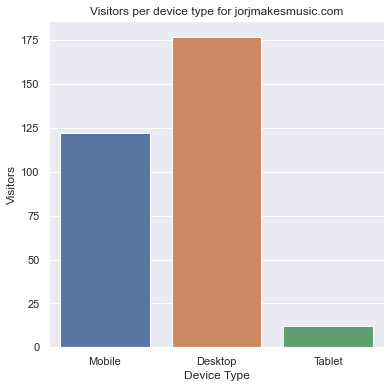

In [4]:
sns.set()
plt.figure(figsize=(6, 6))
ax = sns.countplot(x="Device Type", data=traffic)
ax.set(xlabel='Device Type', ylabel='Visitors', title='Visitors per device type for jorjmakesmusic.com')

plt.show()

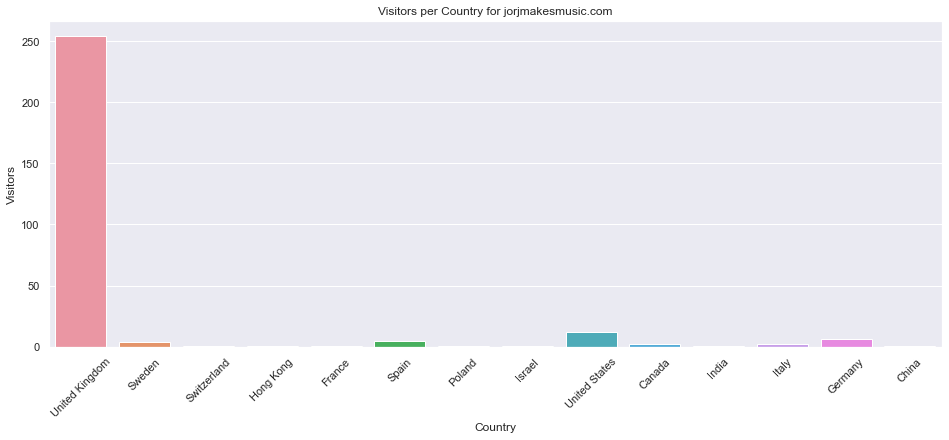

In [5]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x="Country", data=traffic)
ax.set(xlabel='Country', ylabel='Visitors', title='Visitors per Country for jorjmakesmusic.com')

plt.xticks(rotation=45)
plt.show()

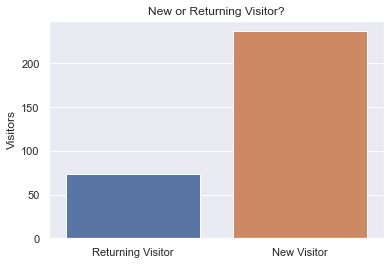

In [6]:
ax = sns.countplot(x="New or Returning Visitor", data=traffic)
ax.set(xlabel=None, ylabel='Visitors', title='New or Returning Visitor?')

plt.show()

Website released 05/05/2020, any data prior to this is therefore of no relevance therefore, data rejected for 'visitor rate per day' graphs.

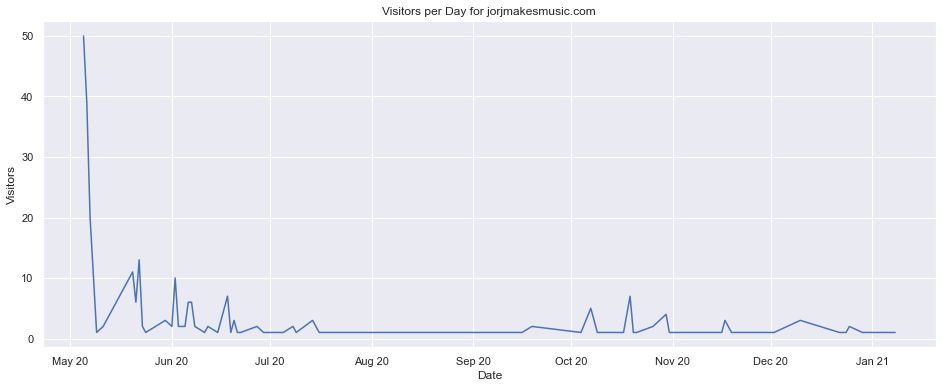

In [7]:
dayData = traffic.index.value_counts().sort_index()['2020-05-05':]

plt.figure(figsize=(16, 6))
ax = sns.lineplot(data=dayData)
ax.set(xlabel='Date', ylabel='Visitors', title='Visitors per Day for jorjmakesmusic.com')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %y"))

plt.show()

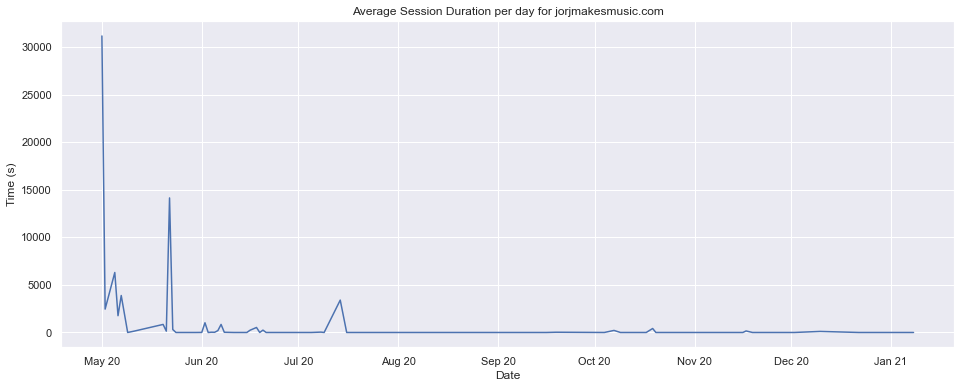

In [8]:
dates = traffic.index.floor('D')
sessionTime = traffic.groupby(dates)['Avg. Session Duration (s)'].sum()

plt.figure(figsize=(16, 6))
ax = sns.lineplot(data=sessionTime)
ax.set(xlabel='Date', ylabel='Time (s)', title='Average Session Duration per day for jorjmakesmusic.com')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %y"))

plt.show()

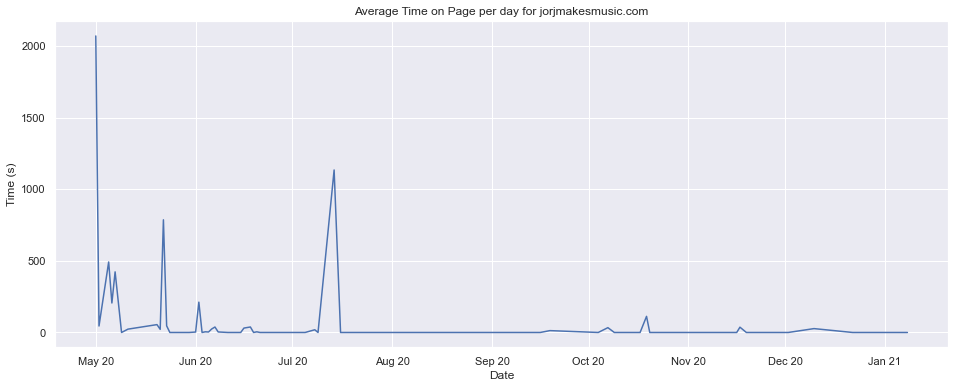

In [9]:
dates = traffic.index.floor('D')
pageTime = traffic.groupby(dates)['Avg. Time on Page (s)'].sum()

plt.figure(figsize=(16, 6))
ax = sns.lineplot(data=pageTime)
ax.set(xlabel='Date', ylabel='Time (s)', title='Average Time on Page per day for jorjmakesmusic.com')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %y"))

plt.show()